# <center> **Tilt-Shift**

#### **Como a maioria do código aqui não funciona no google colab, foi criado um video mostrando o funcionamento do código. O link do vídeo está disponivel em: https://youtu.be/PK0ycqoUR6U**

## **1. Importing data from Google Drive**

In [ ]:
# Montando o drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Processamento Digital de Imagem

/content/drive/MyDrive/Processamento Digital de Imagem


In [ ]:
%cd Tilt-Shift

/content/drive/MyDrive/Processamento Digital de Imagem/Tilt-Shift


## **2. Importing necessary libraries**

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # Import grayscale images
from google.colab.patches import cv2_imshow

## **3. Testing and importing our images**

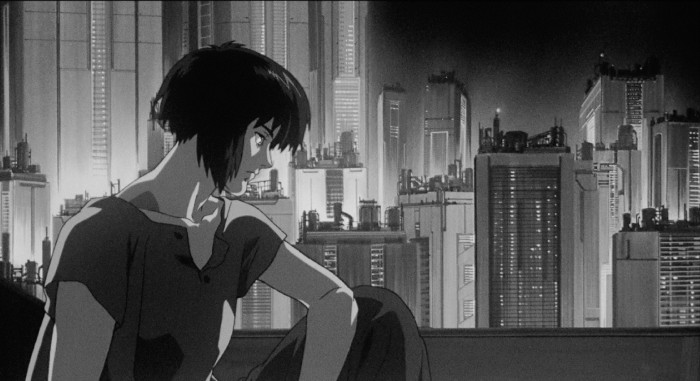

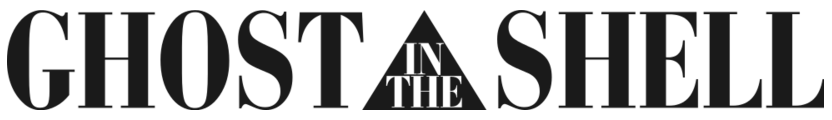

In [ ]:
# Cannot be used on google colab #
img = cv.imread('images/motoko.jpg', cv.IMREAD_GRAYSCALE)
img_l = cv.imread('images/logo.png', cv.IMREAD_GRAYSCALE)


cv2_imshow(img)
cv2_imshow(img_l)

#cv.waitKey(0)
#cv.destroyAllWindows()

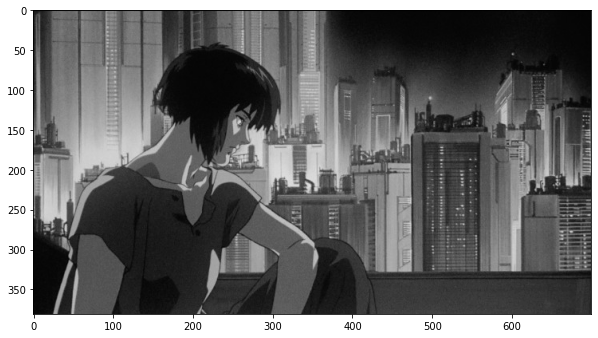

In [ ]:
# Ploting in grayscale with matplotlib #
fname = 'images/motoko.jpg'
image = Image.open(fname).convert("L")
arr = np.asarray(image)

plt.figure(figsize=(10,10))
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)

plt.show()

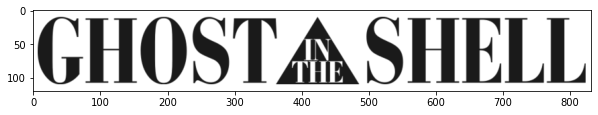

In [ ]:
# Ploting in grayscale with matplotlib #
fname = 'images/logo.png'
image = Image.open(fname).convert("L")
arr = np.asarray(image)

plt.figure(figsize=(10,10))
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)

plt.show()

## **4. Merging two images using addWeights**

Para mesclar duas imagens, será utilizado uma função do próprio openCV chamada: `cv.addWeights()`. Ela é inspirada na expressão g = Beta\*f0 + alpha\*f1, onde f0 e f1 são imagens e alpha e beta = (1 - alpha) são coeficientes. Se baseando na expressão anterior ela possui cinco parâmetros:
* `Imagem 1` - Imagem principal.
* `alpha` - Coeficiente alpha que varia de 0 à 1.
* `Imagem 2` - Imagem que irá por cima.
* `Beta` - (1 - alpha).
* `Gamma` - Meio que a saturação.

**Importante!!** A imagem 1 e 2 devem ter o mesmo tamanho!

In [ ]:
img = cv.imread('images/motoko.jpg', cv.IMREAD_GRAYSCALE)
img_l = cv.imread('images/logo.png', cv.IMREAD_GRAYSCALE)

alpha = 10 / 100
gamma = 0
beta = (1.0 - alpha)

h = img.shape[0]
w = img.shape[1]

imgl = cv.resize(img_l, (w, h), interpolation = cv.INTER_AREA)

dst = cv.addWeighted(imgl, alpha, img, beta, gamma)

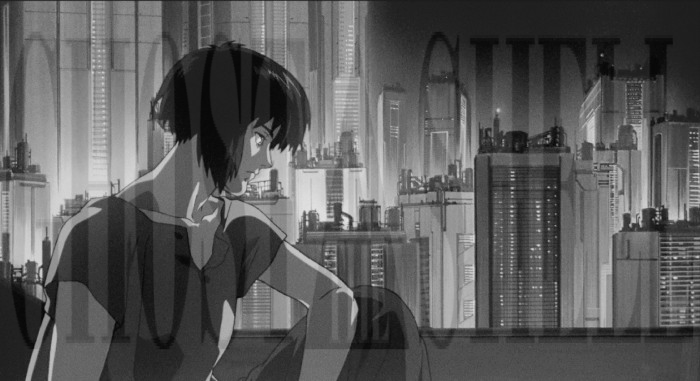

True

In [ ]:
# Cannot be used on google colab #
cv2_imshow( dst)
cv.imwrite('images/motokologo.jpg', dst)

#cv.waitKey(0)
#cv.destroyAllWindows()

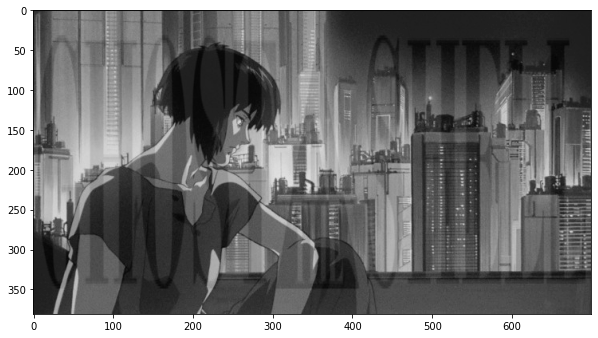

In [ ]:
# Ploting in grayscale with matplotlib #
fname = 'images/motokologo.jpg'
image = Image.open(fname).convert("L")
arr = np.asarray(image)

plt.figure(figsize=(10,10))
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)

plt.show()

## **5. Simple Application**

Nessa simples aplicação foi criado uma função `track(img1, img2, val)` para mesclar duas imagens, como foi feito anteriormente e em seguida ela seria plotada. Em seguida foi criado uma track bar para o valor do `alpha` e esse valor da track bar será o parâmetro `val` da nossa função criada.

Por fim foi criado um Loop `While` para obter continuamente o valor do track bar e chamar a função track, para que ela seja plotada varias vezes.

In [ ]:
def track(img1, img2, val):
    
    alpha = val / 100
    gamma = 5
    beta = (1.0 - alpha)

    h = img1.shape[0]
    w = img1.shape[1]

    # Resize da img2 para o mesmo tamanho da img1 #
    img2 = cv.resize(img2, (w, h), interpolation = cv.INTER_AREA)

    dst = cv.addWeighted(img1, alpha, img2, beta, gamma)
    
    cv.imshow(title_window, dst)
    #cv2_imshow(title_window, dst)

In [ ]:
img1 = cv.imread('images/motoko.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('images/logo.png', cv.IMREAD_GRAYSCALE)


alpha_slider_max = 100
title_window = 'Tilt-Shift'

def pass_func(x):
    pass

cv.namedWindow(title_window)

trackbar_name = 'Alpha x %d' % alpha_slider_max
cv.createTrackbar(trackbar_name, title_window , 0, alpha_slider_max, pass_func)

while(1):
    
    val = cv.getTrackbarPos(trackbar_name, title_window)
    
    track(img1, img2, val)

    k = cv.waitKey(1) & 0xFF
    if k == 27:   # hit escape to quit
        break

cv.destroyAllWindows()

## **6. Exercicio 1**

Para criar uma aplicações onde fosse possivel criar o efeito de Tilt-Shift foi necessário a criação de duas funções: `track(img1, img2, alpha, gamma)` e `create_mask(img, l1, l2, d)`, onde a primeira é para fazer a mistura de duas imagens e a segunda função é para gerar duas máscaras, onde a segunda máscara é o negativo da primeira.

1. As Máscaras - para gerar elas foi utilizado a função matemática: $\frac{tanh(\frac{x-l1}{d}) - tanh(\frac{x-l2}{6})}{d}$, onde `l1` é a parte superior do foco, o `l2` é a parte debaixo do foco e o `d` é o decaimento do foco. Usando essa função foram geradas duas matrizes onde os valores recebidos nas matrizes são valores da função anterior baseado no valor da linha, lembrando que a segunda mascará sempre receberá 1 - valor, por ser o negativo.

2. Em seguida com as máscaras iremos multiplicar elas, pixel a pixel, com a imagem que queremos que tenha o efeito de Tilt-Shift. Primeiramente multiplicaremos a imagem original com a máscara, e em seguida será multiplicado essa imagem borrada pela máscara negativa.

3. Por fim foi criado a função `track(img1, img2, alpha, gamma)` para aplicar a função `cv.addWeights` para mesclar as duas imagens.

4. Para gerar uma aplicação mais iterativa foi gerado três barras com o OpenCV, onde cada barra irá variar: `Centro do foco`, `Parte de baixo do foco`, `Decaimento` e `Intensidade`.

### **6.1 Funções Auxiliares**

In [ ]:
def create_mask(img, l1, l2, d):
    
    # Restringir os valores, para não haver divisão por zero #
    if l1 <= 0:
        l1 = 1
    if l2 >= img.shape[1] - l1:
        l2 = img.shape[1] - l1
    
    h = img.shape[0]
    w = img.shape[1]
    
    l0 = img.shape[0] - l1
    l0 = l0 - l2
    
    if d == 0:
        d = 1
    
    # Criando a matriz de zeros #
    mask = np.zeros((h, w), dtype=np.float32)
    mask_n = np.zeros((h, w), dtype=np.float32)
    
    # Colocando os valores nas matrizes #
    for i in range(h):
        val = (np.tanh((i-l1)/d)-np.tanh((i-l0)/d))/2
        p_val = val
        for j in range(w):
            mask[i][j] = p_val # máscara normal #
            mask_n[i][j] = 1 - p_val # negativo da máscara #
    
    return mask, mask_n

In [ ]:
def track(img1, img2, alpha, gamma):

    beta = (1.0 - alpha)

    h = img1.shape[0]
    w = img1.shape[1]

    img2 = cv.resize(img2, (w, h), interpolation = cv.INTER_AREA)
    
    dst = cv.addWeighted(img1, alpha, img2, beta, gamma)
    dst = dst.astype(np.uint8)
    
    cv.imshow(title_window, dst)

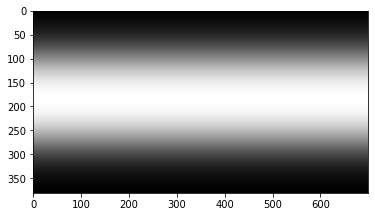

In [ ]:
img = cv.imread('images/motoko.jpg', cv.IMREAD_GRAYSCALE)
mask, mask_n = create_mask(img, 100, 10, 60)

plt.imshow(mask, cmap ='gray')

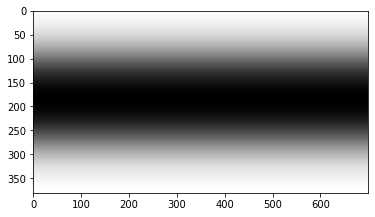

In [ ]:
plt.imshow(mask_n, cmap = 'gray')

In [ ]:
"""img = cv.imread('images/motoko.jpg', cv.IMREAD_GRAYSCALE)
mask, mask_n = create_mask(img, 100, 10, 60)
cv.imshow('imagekk', mask)

cv.waitKey(0)
cv.destroyAllWindows()"""

### **6.2 Aplicação**

In [ ]:
img1 = cv.imread('images/motoko.jpg', cv.IMREAD_GRAYSCALE)
#img1 = img1.astype(np.float32)
#img2 = cv.imread('images/logo.png', cv.IMREAD_GRAYSCALE)

alpha_slider_max = 100
title_window = 'Tilt-Shift'

def pass_func(x):
    pass

cv.namedWindow(title_window)

trackbar_name = 'Center x %d' % alpha_slider_max
trackbar_name1 = 'Lower Bound x %d' % alpha_slider_max
trackbar_name2 = 'Decay x %d' % alpha_slider_max
trackbar_name3 = 'Intensity x %d' % alpha_slider_max


cv.createTrackbar(trackbar_name, title_window , 0, int(img1.shape[0]/2), pass_func)
cv.createTrackbar(trackbar_name1, title_window , 0, img1.shape[0], pass_func)
cv.createTrackbar(trackbar_name2, title_window , 1, alpha_slider_max, pass_func)
cv.createTrackbar(trackbar_name3, title_window , 1, 50, pass_func)

while(1):
    
    l1 = cv.getTrackbarPos(trackbar_name, title_window)
    l2 = cv.getTrackbarPos(trackbar_name1, title_window)
    d = cv.getTrackbarPos(trackbar_name2, title_window)
    gamma = cv.getTrackbarPos(trackbar_name3, title_window)
    
    mask, mask_n = create_mask(img1, l1, l2, d)
    
    blur = cv.GaussianBlur(img1, (3, 3), 0)
    blur = blur.astype(np.uint8)
    mask = mask * img1
    mask_n = mask_n * img1
    
    track(mask, mask_n, 0.9, gamma)

    k = cv.waitKey(1) & 0xFF
    if k == 27:   # hit escape to quit
        break

cv.destroyAllWindows()

## **7. Video Application**

In [ ]:
cap = cv.VideoCapture(0)

count = 0

if not cap.isOpened():
    print("Cannot open camera")
    exit()
    
alpha_slider_max = 100
title_window = 'Tilt-Shift'

def pass_func(x):
    pass

cv.namedWindow(title_window)

trackbar_name = 'Center x %d' % alpha_slider_max
trackbar_name1 = 'Lower Bound x %d' % alpha_slider_max
trackbar_name2 = 'Decay x %d' % alpha_slider_max
trackbar_name3 = 'Intensity x %d' % alpha_slider_max

# Criando as barras #
cv.createTrackbar(trackbar_name, title_window , 0, int(img1.shape[0]/2), pass_func)
cv.createTrackbar(trackbar_name1, title_window , 0, img1.shape[0], pass_func)
cv.createTrackbar(trackbar_name2, title_window , 1, alpha_slider_max, pass_func)
cv.createTrackbar(trackbar_name3, title_window , 1, 50, pass_func) 

while True:
    count += 1
    if count == 2:
        count = 0
        continue
   
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    
    # variaveis #
    l1 = cv.getTrackbarPos(trackbar_name, title_window)
    l2 = cv.getTrackbarPos(trackbar_name1, title_window)
    d = cv.getTrackbarPos(trackbar_name2, title_window)
    gamma = cv.getTrackbarPos(trackbar_name3, title_window)
    
    # Captura do video #
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Criando as mascaras #s
    mask, mask_n = create_mask(gray, l1, l2, d)
    
    # Operações #
    blur = cv.GaussianBlur(gray, (3, 3), 0)
    #blur = blur.astype(np.uint8)
    mask = mask * gray
    mask_n = mask_n * blur
    
    track(mask, mask_n, 0.9, gamma)
    
    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()